#  $$Introdução~a~Série~Temporal$$

$$Conceito:$$
    
- **Conjunto de observações feitas em sequência ao longo do tempo**


- **Cada variável representa um série, podendo ser univariada (apenas uma variável concetada ao tempo) ou multivariada (duas ou mais variáveis conectadas ao tempo)**


**Componentes:** 


- **Tendência:** Padrão de crescimento/decrescimento da variável em um certo período de tempo.


- **Ciclo:** Caracterizado pela oscilação de longo prazo de subida e descida nas séries (de forma suave e repetida) ao longo do componente da tendência


- **Sazonalidade:** Padrões de comportamento que se repetem em específicas épocas do ano ou período de tempo.


- **Ruido (Passeio Aleatório):** Série não estacionária, como o valor no tempo t é igual ao valor no tempo anterior mais um ruído aleatório, os valores em passeio aleatório dependem de seus valores anteriores, resultando em uma correlação entre valores consecutivos,


- **Ruido branco:** Série estacionária, Distribuição normal, média e autocorrelação iguais a zero, ou seja, suas observações são independentes (não correlacionadas) e identicamente distribuídas com média zero e variância constante

**Classificação:**


- **Estacionaria:** Os dados variam em torno da média ao longo do tempo, media igual a zero e variância constante


- **Não Estacionaria:** Segue uma tendência e os dados não retorna a media


- **Determinística:** Quando pode ser descrita por uma função matemática para estabelecer exatamente os valores futuros da série.


- **Estocástica:** Quando os valores futuros da série somente podem ser estabelecidos em termos probabilísticos, pois o modelo compõe-se também de um termo aleatório.


**Decomposição:**


- **Clássica:** 

- Sazonalidade é a mesma durante toda a série, assim, para séries muito longas, essa não seria uma premissa razoável

- Valores atípicos podem ter um grande impacto nas estimativas da Tendência e Sazonalidade

- Não consegue lidar com valores missing


- **STL**

- Baseado na aplicação de suavização 

- Decomposição de uma série temporal aditiva

- Permite lidar com valores missing


**Modelos de Decomposição:**


- **Aditivo:** Série formada pela soma dos componentes (Tendencia,Ciclo, Sazonalidade e Resíduos), O modelo aditivo geralmente é considerado mais adequado para dados em que as flutuações sazonais permanecem  aproximadamente do mesmo tamanho com o tempo.
    
    
- **Multiplicativo:** Série formada pela multiplicação dos componentes (Tendencia, Ciclo, Sazonalidade e Resíduos), O modelo multiplicativo é normalmente aplicado a dados em que o tamanho dos efeitos sazonais aumentam ao longo do tempo.





**Objetivos de uma análise de séries temporais:**


- Compreender o mecanismo gerador da série;


- Predizer o comportamento futuro da série.






In [2]:
#Pacotes
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Componentes de Série Temporal 

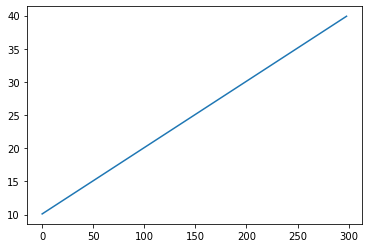

In [3]:
#Tendência

n = np.arange(1,300)

# Serie 
x = 0.1 # Vai crescer em 0.1 por dados
alpha = 10
dados = pd.DataFrame(n)
dados['x'] = x
dados['Tendencia'] = dados['x'] * dados[0] + alpha
plt.plot(dados['Tendencia']);

**Série com tendência de alta**

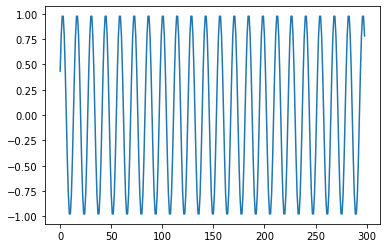

In [4]:
#Sazonalidade

dados['Sazonalidade'] = 1*np.sin((2*np.pi/14)*np.arange(1,300))
plt.plot(dados['Sazonalidade']);

**Quanto maior o período de sazonalidade, menos aleatório será os dados***

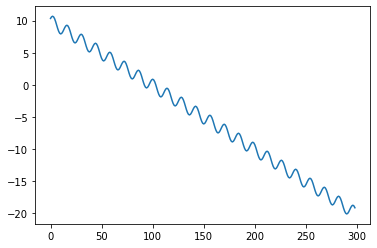

In [5]:
# Tendencia + Sazonalidade

x = -0.1 # Vai crescer em 0.1 por dados
alpha = 10
dados['x'] = x
dados['Tendencia_N'] = dados['x'] * dados[0] + alpha

plt.plot (dados['Sazonalidade'] + dados['Tendencia_N']);

**Série com sazonalidade e tendência de baixa**

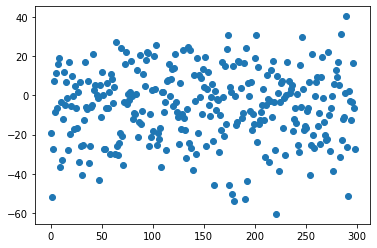

In [6]:
#Residuo ou Ruido (passeio Aleatorio)
dados['ruido']=np.random.normal(-5, 18, 299)
plt.scatter(range(0,299),np.random.normal(-5, 18, 299));

In [7]:
med= dados['ruido'].mean()
var = np.var(dados['ruido'])
print(f'Média = {med}')
print(f'Variância = {var}')

Média = -4.729268049624516
Variância = 283.91111625935724


**Note que no passeio aleatório a média não gira em torno de 0 e a variância é alta**

**OBS: Quanto maior for a variância e o ruido, mais difícil será verificar a tendencia e a sazonalidade, quando o resíduo apresentar uma variância alta temos que aplicar diferenciação para elimina-la**

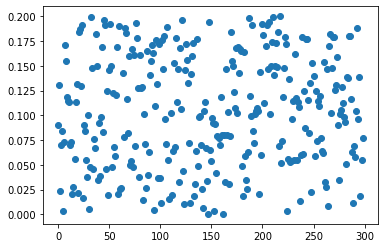

In [8]:
# Ruido Braco 
dados['ruido_branco']= np.random.uniform(low=0.0, high=0.2, size=299)
plt.scatter(range(0,299),dados['ruido_branco']);

In [9]:
med1 = dados['ruido_branco'].mean()
var1 = np.var(dados['ruido_branco'])
print(f'Média = {med1}')
print(f'Variância = {var1}')

Média = 0.1040777217773756
Variância = 0.003128043131114395


**Ruido Branco é uma série estacionaria, média igual a 0 e variância constante**

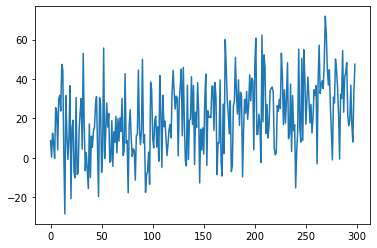

In [10]:
# Plotando toda serie (Tendencia + Sazonalidade + Ruido (passeio Aleatorio))
dados['Serie_Ruido'] = dados.Tendencia + dados.Sazonalidade + dados.ruido
plt.plot(dados['Serie_Ruido']);

**Quando o ruido é alto, não temos uma definição de tendencia e sazonalidade na série**

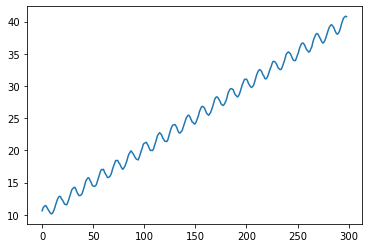

In [11]:
# Plotando toda serie (Tendencia + Sazonalidade + Ruido Branco)
dados['Serie_com_Ruido_Branco'] = dados.Tendencia + dados.Sazonalidade + dados.ruido_branco
plt.plot(dados['Serie_com_Ruido_Branco'])

**O ruido branco é estacionário, portanto, dá para identificar a tendencia e a sazonalidade da série**

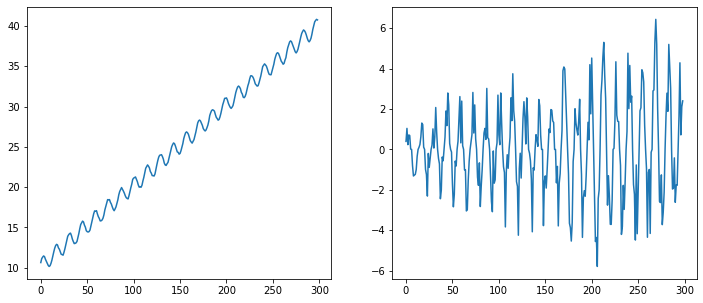

In [12]:
#Série aditiva e Multiplicativa

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))

axes[0].plot(dados.Tendencia + dados.Sazonalidade + dados.ruido_branco);

axes[1].plot(dados.Tendencia * dados.Sazonalidade * dados.ruido_branco);


**Dependendo da forma como os componentes são atribuídos, a perspectiva de análise é totalmente diferente**

**OBS: Mesma Série Temporal composta de maneiras diferentes**

## Decomposição:

### Classica

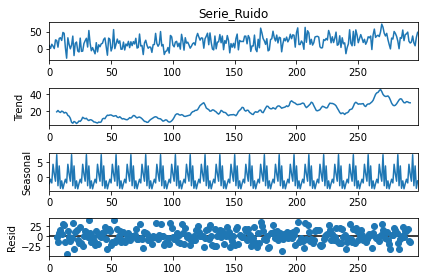

In [35]:
result=seasonal_decompose(dados['Serie_Ruido'],period=12)
re = result.plot()

In [37]:
# Extrair os componentes
# Valores reais = Produto de (sazonal * tendência * resíduo)


dados_serie_reconstruida = pd.concat([result.seasonal, 
                                      result.trend, 
                                      result.resid, 
                                      result.observed], axis = 1)

# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

dados_serie_reconstruida.iloc[50:55,:]

,Sazonalidade,Tendência,Resíduos,Valores_Observados
50,-1.746601,15.714055,-21.277747,-7.310293
51,4.191952,14.887733,-15.005666,4.074019
52,1.136225,14.204596,40.368154,55.708975
53,-1.193069,14.630950,-13.834206,-0.396325
54,7.239502,14.897421,-9.251506,12.885418


**Note que a soma da sazonalidade + tendência + resíduo = Valores_Observados**

### STL

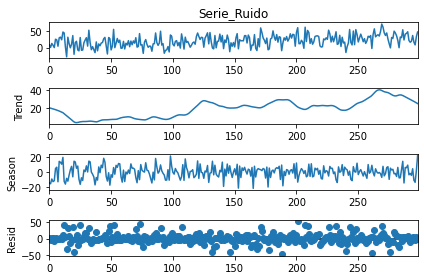

In [14]:
#robust = Diminui a influencia de outliers
from statsmodels.tsa.seasonal import STL

stl = STL(dados['Serie_Ruido'], robust = True,period=12).fit() 
stl.plot() 
plt.show()

## Comparação entre as duas formas de Decomposição

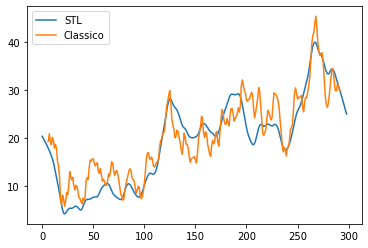

In [15]:
#Compração entre as tendências
plt.plot(stl.trend,label='STL')
plt.plot(result.trend,label='Classico')
plt.legend()

**A Decomposição clássica na tendência tem mais interferência do ruido, enquanto o STL o ruido é mais suavizado**

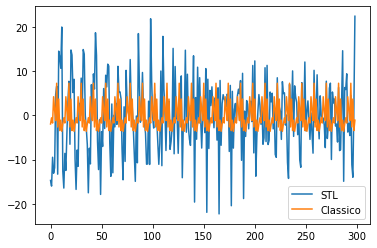

In [16]:
#Compração entre as Sazonalidades

plt.plot(stl.seasonal,label='STL')
plt.plot(result.seasonal,label='Classico')
plt.legend();

**Efeito Sazonal STL assume uma forma dinâmica, enquanto o clássico mantem um padrão único**

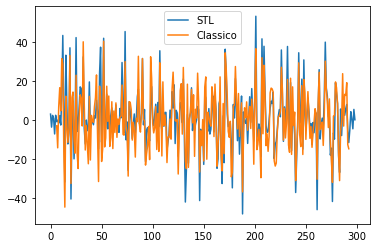

In [17]:
#Compração entre os Ruidos
plt.plot(stl.resid,label='STL')
plt.plot(result.resid,label='Classico')
plt.legend()

**O Ruido STL capta mais a variabilidade dos dados, pois atinge pontos mais elevados**

# Criando Séries Temporais em Periodos diferentes

- Anos

In [419]:
#Criar data
data = pd.date_range('2021',freq='A',periods=10)

#Criar os valores 
vendas = np.random.randint(1,366,10)

#Criar um serie
df = pd.DataFrame(vendas,index=data,columns=['Vendas']);df
df

#Media dos anos 
print(f'\nMedia de Vendas: {df.mean()[0]}')
df



Media de Vendas: 142.9


,Vendas
2021-12-31,275
2022-12-31,106
2023-12-31,44
2024-12-31,130
2025-12-31,284
2026-12-31,93
2027-12-31,104
2028-12-31,84
2029-12-31,270
2030-12-31,39


**Observe que somente os anos se alteram**

In [420]:
#Transformar a coluna em datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-12-31 to 2030-12-31
Freq: A-DEC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Vendas  10 non-null     int32
dtypes: int32(1)
memory usage: 120.0 bytes


In [422]:
#Mover o index para coluna
df =df.reset_index()

#Transformação em datetime
pd.to_datetime(df['index'])

#Transformar coluna em index
df = df.set_index('index')

#Indice em formato datetimeindex
df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-12-31 to 2030-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Vendas  10 non-null     int32
dtypes: int32(1)
memory usage: 120.0 bytes


**Para usar os dados como série temporal, precisa transformar as datas no formato datetime**

- Serie temporal com frequência diaria, 365 dias

In [360]:
#Criar data
data = pd.date_range('2021',freq='D',periods=365)

#Criar os valores 
vendas = np.random.randint(1,366,365)

#Criar um serie
df = pd.Series(vendas,index=data);df
print(df)

#Soma das vendas totais
s = df.resample('10A').sum()[0]
print(f'\nSoma das vendas totais: {s}')


2021-01-01    206
2021-01-02    149
2021-01-03    119
2021-01-04     35
2021-01-05    249
             ... 
2021-12-27     73
2021-12-28    233
2021-12-29    233
2021-12-30    257
2021-12-31     97
Freq: D, Length: 365, dtype: int32

Soma das vendas totais: 70992


**Frequência diária, cada ponto da série é dado por um dia do ano**

- Série temporal mensal

In [131]:
#Criar data
data = pd.date_range('2021',freq='M',periods=12)

#Criar os valores 
vendas = np.random.randint(1,1000,12)

#Criar um serie
df = pd.Series(vendas,index=data);df


2021-01-31    811
2021-02-28    350
2021-03-31    160
2021-04-30    110
2021-05-31    296
2021-06-30     30
2021-07-31    315
2021-08-31    533
2021-09-30    925
2021-10-31    756
2021-11-30    878
2021-12-31    320
Freq: M, dtype: int32

**Cada ponto de dados é um mês dos ano**

-  Série temporal em Horas

In [364]:
#Criar data
data = pd.date_range('2021',freq='H',periods=24)

#Criar os valores 
vendas = np.random.randint(1,1000,24)

#Criar um serie
df = pd.Series(vendas,index=data);df
print(df)

#Media dos valores a cada 6h
w = df.resample('6H').mean()
print(f'\nMédia dos valores a cada 6h:\n\n{w}')


2021-01-01 00:00:00     87
2021-01-01 01:00:00    270
2021-01-01 02:00:00     35
2021-01-01 03:00:00    620
2021-01-01 04:00:00    291
2021-01-01 05:00:00    195
2021-01-01 06:00:00    374
2021-01-01 07:00:00    629
2021-01-01 08:00:00    977
2021-01-01 09:00:00    855
2021-01-01 10:00:00    266
2021-01-01 11:00:00    839
2021-01-01 12:00:00    183
2021-01-01 13:00:00    699
2021-01-01 14:00:00    402
2021-01-01 15:00:00    719
2021-01-01 16:00:00    839
2021-01-01 17:00:00     25
2021-01-01 18:00:00    267
2021-01-01 19:00:00     24
2021-01-01 20:00:00    328
2021-01-01 21:00:00    475
2021-01-01 22:00:00    739
2021-01-01 23:00:00    875
Freq: H, dtype: int32

Média dos valores a cada 6h:

2021-01-01 00:00:00    249.666667
2021-01-01 06:00:00    656.666667
2021-01-01 12:00:00    477.833333
2021-01-01 18:00:00    451.333333
Freq: 6H, dtype: float64


**Cada ponto de dado é acrescido 1 hora**

## Série Temporal Multivariada (Dia da Semana X Mês)

In [423]:
## Criar Dataframe com Data
data = pd.date_range('2021',freq='M',periods=12)
df =pd.DataFrame(np.random.randint(10000, size=(12, 7)),index=data,columns=list('STQQSSD'))
df['Total_Mes'] = df.sum(axis=1)
df

,S,T,Q,Q,S,S,D,Total_Mes
2021-01-31,4948,4357,3430,6655,5031,2889,8215,35525
2021-02-28,811,3117,7995,2190,602,1128,7322,23165
2021-03-31,7758,911,2886,4463,2516,7818,5376,31728
2021-04-30,1587,3316,9866,1728,7517,6594,4735,35343
2021-05-31,2132,8997,1114,2838,1069,4244,9432,29826
2021-06-30,5625,8805,8170,5071,8075,8815,1420,45981
2021-07-31,7092,3951,8786,2962,2421,4721,1899,31832
2021-08-31,2270,5342,2046,1379,9068,7144,9755,37004
2021-09-30,4475,5487,7506,7807,5200,16,6822,37313
2021-10-31,4158,2423,9779,3555,9184,1309,2961,33369


**Tabela com séries temporais multivariada com os valores de cada série divididos em dias da semana**

## Agregando períodos

In [39]:
#Dataset Comleto
df = pd.read_csv('USAccDeaths.csv',sep=';')
df['time'] = pd.date_range('1973',freq='M',periods=72)
df = df.set_index('time')


### Media por Semestre

In [40]:
#Agregando período de 6 meses
plt_mes = df.resample('6M').mean();plt_mes

,value
time,
1973-01-31,9007.000000
1973-07-31,9721.833333
1974-01-31,9372.166667
1974-07-31,8631.166667
1975-01-31,8874.500000
1975-07-31,8722.666667
1976-01-31,8380.333333
1976-07-31,8466.500000
1977-01-31,8336.166667


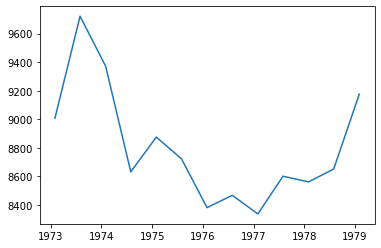

In [41]:
#Plot dos períodos agregados
plt.plot(plt_mes)
plt.show()

**As mortes durante o mês de julho de 1973 aumentaram drasticamente**

### Soma dos períodos Anuais

In [42]:
#Dataset 
df = pd.read_csv('USAccDeaths.csv',sep=';')
df['time'] = pd.date_range('1973',freq='M',periods=72)
df = df.set_index('time')

plt_year = df.resample('1Y').sum();plt_year 

,value
time,
1973-12-31,115821
1974-12-31,104622
1975-12-31,103063
1976-12-31,100741
1977-12-31,102922
1978-12-31,105624


**Perírodo: Ano, Mês e dia**

In [44]:
#Dataset 
df = pd.read_csv('USAccDeaths.csv',sep=';')
df['time'] = pd.date_range('1973',freq='M',periods=72)

#Agrupar
plt_ano = df.groupby(df['time'].dt.strftime('%Y'))['value'].sum().sort_index() #Extrair os meses
plt_ano

time
1973    115821
1974    104622
1975    103063
1976    100741
1977    102922
1978    105624
Name: value, dtype: int64

**Périodo: Ano**

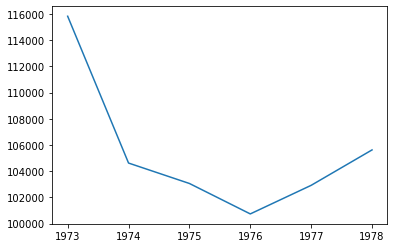

In [45]:
#Plot
plt.plot(plt_ano);

**Houve uma queda nas mortes durante os anos**

## Janela temporal

- Filtrar períodos importantes da série

### Filtrar somente o Ano de 1976

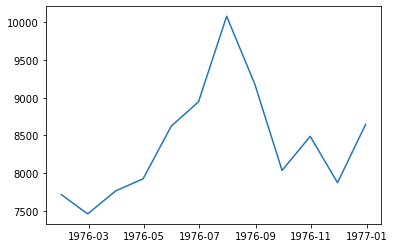

In [46]:
#Dataset 
df = pd.read_csv('USAccDeaths.csv',sep=';')
df['time'] = pd.date_range('1973',freq='M',periods=72)

#Filtro
df['Ano'] = df.time.dt.year
valor_anos =df.loc[(df['Ano'] ==1976)]
valor_anos = valor_anos[['value','time']]
valor_anos = valor_anos.set_index('time')
plt.plot(valor_anos);


**Observamos uma alta variação dos dados durante o ano**

### Dos Anos entre  1975 e 1977

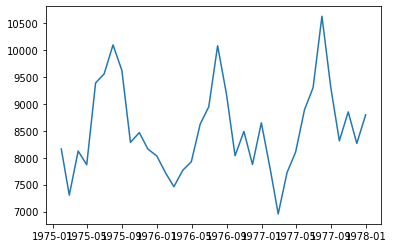

In [47]:
#Dataset 
df = pd.read_csv('USAccDeaths.csv',sep=';')
df['time'] = pd.date_range('1973',freq='M',periods=72)


df['Ano'] = df.time.dt.year

valor_anos=df.loc[(df['Ano']>= 1975)&(df['Ano']<=1977)]
valor_anos = valor_anos[['value','time']]
valor_anos = valor_anos.set_index('time')
plt.plot(valor_anos);

**O Grafico mostra sazonalidade constante e estacionariedade nos dados**

# Conclusão:

**Uma série temporal é na verdade o conjunto de componentes que podem ser extraídos, transformados, analisados e usados para fazer previsões.**s